In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [4]:
df = df[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']
]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

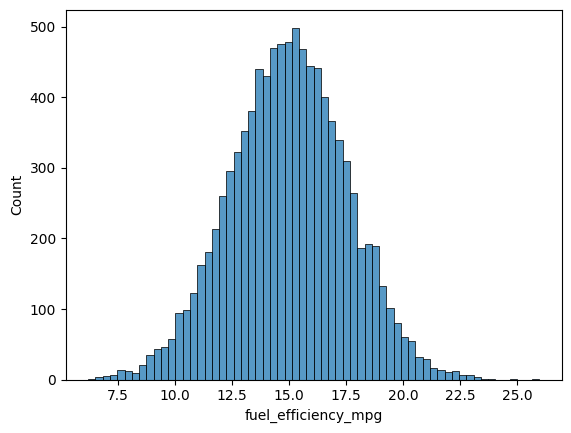

In [5]:
sns.histplot(df.fuel_efficiency_mpg)

### Question 1

In [6]:
df.columns[df.isnull().sum() > 0]

Index(['horsepower'], dtype='object')

### Question 2

In [7]:
df.horsepower.median()

np.float64(149.0)

### Preparation step

In [8]:
n = len(df)

n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [9]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


def prepare_X(df, fillna_zero=True):
    df = df.copy()

    if fillna_zero is True:
        df = df.fillna(0)
    else:
        df = df.fillna(df.horsepower.mean())
    
    X = df.values

    return X

def prepare_X_v2(df, fillna_zero=True):
    df = df.copy()

    if fillna_zero is True:
        df = df.fillna(0)
    else:
        df = df.fillna(df_train.horsepower.mean())
    
    X = df.values

    return X

### Question 3

In [13]:
X_train = prepare_X(df_train, fillna_zero=True)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_zero=True)


y_val_pred = w0 + X_val.dot(w)
score_zero = rmse(y_val, y_val_pred)

In [14]:
X_train = prepare_X(df_train, fillna_zero=False)

w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_zero=False)


y_val_pred = w0 + X_val.dot(w)
score_mean_v1 = rmse(y_val, y_val_pred)

In [15]:
# X_train = prepare_X_v2(df_train, fillna_zero=False)

# w0, w = train_linear_regression(X_train, y_train)

# X_val = prepare_X_v2(df_val, fillna_zero=False)


# y_val_pred = w0 + X_val.dot(w)
# score_mean_v2 = rmse(y_val, y_val_pred)

In [17]:
print(score_zero)
print(score_mean_v1)

if round(score_zero, 2) < round(score_mean_v1, 2):
    print('zero is better')
elif round(score_zero, 2) > round(score_mean_v1, 2):
    print('mean is better')
else:
    print('both are equally good')
    

0.5173782638857467
0.4636236995038883
mean is better


### Question 4

In [18]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + np.eye(XTX.shape[0])*r
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [20]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train, fillna_zero=True)
    
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_val = prepare_X(df_val, fillna_zero=True)
    
    
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)

    print(r, round(score, 2))
        

0 0.52
0.01 0.52
0.1 0.52
1 0.52
5 0.52
10 0.52
100 0.52


### Question 5

In [21]:
n = len(df)
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores = []
for i in seed_values:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train, fillna_zero=True)   
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, fillna_zero=True)
    
    
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)
    scores.append(score)
        

In [24]:
print(round(np.std(scores), 3))

0.007


### Question 6

In [25]:
n = len(df)

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concat([y_train, y_val])

X_full_train = prepare_X(df_full_train, fillna_zero=True)   
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_zero=True)


y_test_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_test_pred)


In [26]:
score

np.float64(0.5156261299167999)